In [1]:
#1a testing over left.png and right.png
import numpy as np     
from PIL import Image
def Entropy(PMF):
    p=0
    for x in PMF:
        if x!=0:
            p-=x*(np.log2(x))
    return p
def D_pq(PMF1,PMF2):
    p=0
    for x in range(len(PMF1)):
        if PMF1[x]!=0 and PMF2[x]!=0:
            p+=PMF1[x]*(np.log2(PMF1[x]/PMF2[x]))
    return p
im = Image.open('left.png', 'r')
im1 = Image.open('right.png', 'r')
pix_val = list(im.getdata())
pix_val1 = list(im1.getdata())
elements_count =[0]*256
# iterating over the elements for frequency
for element in pix_val:
    elements_count[element] += 1
out = np.divide(elements_count, len(pix_val))
entropy=Entropy(out)
elements_count1 =[0]*256
# iterating over the elements for frequency
for element in pix_val1:
    elements_count1[element] += 1
out1 = np.divide(elements_count1, len(pix_val1))
k=D_pq(out,out1)
m=Entropy(out)
print("CE:",k+m)

CE: 7.273398119987328


value of p at which plot attained its minimum: 0.7000000000000005
Mininmum H(p,q) value is: 0.8812908992306927
H(p,q) plot


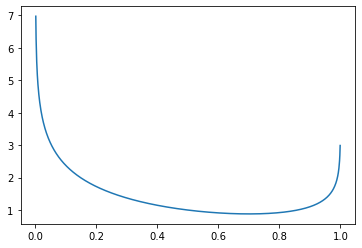

In [2]:
#plotiing the H(p,q) and finding the value of p at which it is minimum ass well as its value
import matplotlib.pyplot as plt
PMF1=[0.3,0.7]
count=0.001
p1=[]
p2=[]
p3=[]
while count<1:
    PMF2=[1-count,count]
    p1.append(count)
    p2.append(float(Entropy(PMF1))+float(D_pq(PMF1,PMF2)))
    count+=0.001
m=min(p2)
print("value of p at which plot attained its minimum:",p1[p2.index(m)])
print("Mininmum H(p,q) value is:",m)
print("H(p,q) plot")
plt.plot(p1,p2)
plt.show()

In [3]:
#1b calculating the JS value
out2=(out+out1)/2
k=D_pq(out,out2)
m=D_pq(out1,out2)
print("JS(p,q):",k+m)
print("JS(q,p):",m+k)

JS(p,q): 0.0073460795386296514
JS(q,p): 0.0073460795386296514


value of p at which plot attained its minimum: 0.5000000000000003
Minimum JS value is: -8.008566259537289e-17
JS plot


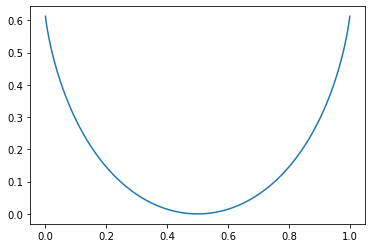

In [4]:
#JS plot
import matplotlib.pyplot as plt
PMF1=[0.5,0.5]
count=0.001
p1=[]
p2=[]
p3=[]
while count<1:
    PMF2=[1-count,count]
    PMF3=[(1+PMF1[0]-count)/2,(PMF1[1]+count)/2]
    p1.append(count)
    p2.append(float(D_pq(PMF1,PMF3))+float(D_pq(PMF2,PMF3)))
    count+=0.001
m=min(p2)
print("value of p at which plot attained its minimum:",p1[p2.index(m)])
print("Minimum JS value is:",m)
print("JS plot")
plt.plot(p1,p2)
plt.show()

As here we can see that JS(p,q)=D(p||m)+D(q||m)=D(q||m)+D(p||m)=JS(q,p) hence it is symmetric (m=(p+q)/2 in both the cases)

2a
i)For data mapping in higher dimension space, the area in lower dimension mapping is insufficient so it is really challenging to reduce it to lower dimesnion this is termed as the crowding problem.

ii)The Student t-distribution is a highly tailed gaussian distribution that uses the inverse square law for large pairwise distances to calculate the joint probability in low-dimensional space, making the joint probability distribution almost invariant for low-dimensional space mapping.

iii)SNE has gone through two major transformations.
To calculate gradients quickly, the t-SNE cost function uses a symmetrized version of the SNE cost function.
To avoid crowding and optimization difficulties, t-SNE employs a heavy-tailed distribution rather than a gaussian distribution.

In [5]:
#2b
import math
#function which calculates Pj/i value for input variables i,j,X matrix
def Pj_i(i,j,XX,sig):
    sum=0
    for t in range(len(XX)):
        if i != t:
            s=(np.linalg.norm(XX[t] - XX[i]))**2#expression
            s=s/2*(sig)**2
            sum+=math.exp(-1*s)#overall sum    
    return math.exp(-1*((np.linalg.norm(XX[i] - XX[j]))**2)/2*(sig)**2)/sum #overall expression
#function which returns Pij from pj/i and pi/j
def pij(i,j,XX,sig):
    return (Pj_i(i,j,XX,sig)+Pj_i(j,i,XX,sig))/(2*len(XX))#expression
#function which calculates qij from Y matrix
def qij(i,j,YY,sig):
    s=0
    for t in range(len(YY)):
        for k in range(len(YY)):
            if k != t:
                s+=(1+(np.linalg.norm(YY[t] - YY[k]))**2)**(-1)#denominator expression
    return (1+(np.linalg.norm(YY[i] - YY[j]))**2)**(-1)/s # whole expression

In [6]:
#function which returns the whole P matrix containing all Pij terms init
def complete_p(XX,sig):
    i=len(XX)
    j=len(XX[0])
    mat=np.zeros([i,i])
    for a in range(i):
        for b in range(i):
                mat[a][b]=pij(a,b,XX,sig)
    return mat
#function which returns the whole Q matrix containing all Qij terms init
def complete_q(YY,sig):
    i=len(YY)
    j=len(YY[0])
    mat=np.zeros([i,i])
    for a in range(i):
        for b in range(i):
                mat[a][b]=qij(a,b,YY,sig)
    return mat

In [7]:
#function which returns the value of dc/dYi for i index
def dc_dyi(XX,YY,i):
    s=0
    for j in range(len(XX[0])):
        s+=(pij(i,j,XX,0.1)-qij(i,j,YY,0.1))*((1+(np.linalg.norm(XX[i] - XX[j]))**2)**(-1))#expression 
    s=4*s
    return s
#function which returns the whole dc/dy(gradient) matrix containing all dc/dYi terms init
def fill_dc_dy(XX,YY):
    mat=np.zeros([len(YY),len(YY[0])])
    i=len(YY)
    for x in range(i):
        mat[x]=dc_dyi(XX,YY,x)
    return mat

In [32]:
def func_D_pq(P,Q):
    p=0
    for x in range(len(P)):
        for y in range(len(P[0])):
            if P[x][y]!=0 and Q[x][y]!=0:
                p+=P[x][y]*(np.log2(P[x][y]/Q[x][y]))
    return p

In [9]:
#forming 2 clusters where one cluster belongs to 0 and another belongs to 1 
cluster1 = np.random.multivariate_normal([1]*10, 0.01 * np.identity(10), 10)#10d matrix
cluster2 = np.random.multivariate_normal([10]*10, 0.01 * np.identity(10), 10)
XX = np.concatenate((cluster1, cluster2), axis=0) # concatenation
YY = np.random.multivariate_normal([0]*2, 0.0001 * np.identity(2), 20)#taking some arbitrary 2D matrix

In [33]:
#beginning 
P=complete_p(XX,0.1)
Q=complete_q(YY,0.1)
print("Initial value of D(p||q):",func_D_pq(P,Q))

Initial value of D(p||q): 1.0542996833928382


Scatter Plot of Y before iterations


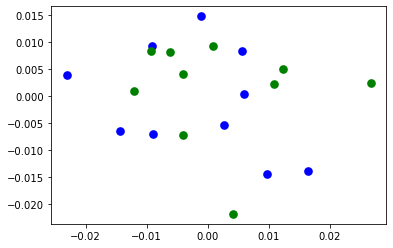

In [11]:
#plotting the final graph after 50 iterations
import matplotlib.pyplot as plt
col=[]  
for i in range(0, len(YY)):
    if i<len(YY)/2:
        col.append('blue')  
    else:
        col.append('green') #assigning 2 colours for 2 clusters
print("Scatter Plot of Y before iterations")
for i in range(len(YY)):
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(YY[i][0], YY[i][1], c = col[i], s = 75,
                linewidth = 0)
plt.show()

In [12]:
def finding_YY(YY,XX,alpha,lr_rate):
    Prev_YY=YY.copy()#storing previous value of Y 
    Prev_YYY=YY.copy()#storing the previous previous value of Y
    mat=fill_dc_dy(XX,YY)#calling the fill_dc-dy function
    for t in range(50):#50 iterations taking learning rate 0.5 and alpha 0.9
        YY=Prev_YY+lr_rate*mat+alpha*(Prev_YY-Prev_YYY)#expression
        mat=fill_dc_dy(XX,YY)#updating the dc/dY matrix
        if t>=1:
            Prev_YYY=Prev_YY.copy()#storing the previous previous values
        Prev_YY=YY.copy()#storing the previous values
    return YY

In [13]:
def plotting_func(YY):
    import matplotlib.pyplot as plt
    col=[]  
    for i in range(0, len(YY)):
        if i<len(YY)/2:
            col.append('blue')  
        else:
            col.append('green') #assigning 2 colours for 2 clusters
    print("Scatter Plot of Y after 50 iterations")
    for i in range(len(YY)):
        # plotting the corresponding x with y 
        # and respective color
        plt.scatter(YY[i][0], YY[i][1], c = col[i], s = 75,
                linewidth = 0)
    plt.show()

Scatter Plot for alpha=0.9 and lr_rate=0.1 after 50 iterations
Scatter Plot of Y after 50 iterations


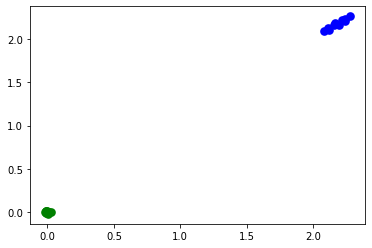

Scatter Plot for alpha=0.9 and lr_rate=0.3 after 50 iterations
Scatter Plot of Y after 50 iterations


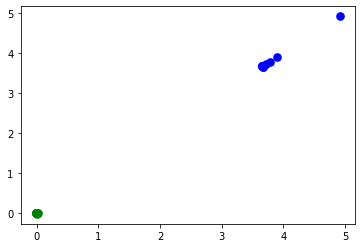

In [14]:
print("Scatter Plot for alpha=0.9 and lr_rate=0.1 after 50 iterations")    
YY1=finding_YY(YY,XX,0.9,0.1)
plotting_func(YY1)
print("Scatter Plot for alpha=0.9 and lr_rate=0.3 after 50 iterations") 
YY1=finding_YY(YY,XX,0.9,0.3)
plotting_func(YY1)

Scatter Plot for alpha=0.9 and lr_rate=0.5 after 50 iterations
Scatter Plot of Y after 50 iterations


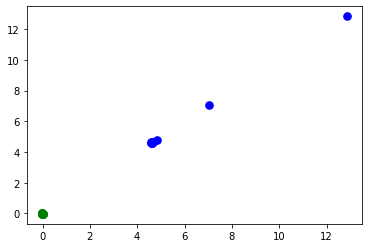

Scatter Plot for alpha=0.9 and lr_rate=0.7 after 50 iterations
Scatter Plot of Y after 50 iterations


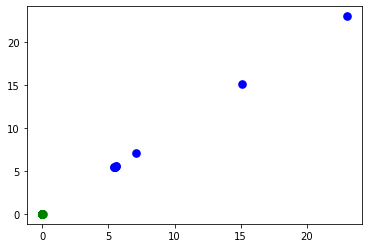

In [15]:
print("Scatter Plot for alpha=0.9 and lr_rate=0.5 after 50 iterations")  
YY1=finding_YY(YY,XX,0.9,0.5)
plotting_func(YY1)
print("Scatter Plot for alpha=0.9 and lr_rate=0.7 after 50 iterations") 
YY1=finding_YY(YY,XX,0.9,0.7)
plotting_func(YY1)

#Observations
keeping alpha constant to 0.9 and started incresing learning rate from 0.1 to 0.7 we can clearly see from the plots that the cluster is being spreaded as the learing rate is being increased and we can clearly see 2 individual clusters at lr=0.16 as denoted below 

Scatter Plot of Y after 50 iterations
Scatter Plot of Y after 50 iterations


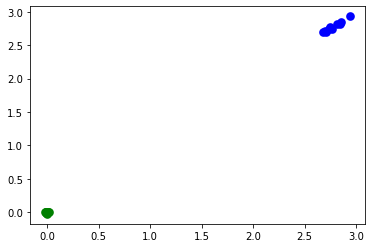

In [16]:
print("Scatter Plot of Y after 50 iterations")    
YY1=finding_YY(YY,XX,0.9,0.16)
plotting_func(YY1)

In [34]:
P=complete_p(XX,0.1)
Q=complete_q(YY1,0.1)
print("final value of D(p||q) after 50 iterations:",func_D_pq(P,Q))

final value of D(p||q) after 50 iterations: 0.039492764281317365


the value of D(p||q) before the 0th iteration is 1.0542996833928382  and after 50 iterations it has drastically decreased to 0.039492764281317365. here as we know that D(p||q) is nothing but the distance between 2 distributions so initially we have calculated before the iterations so the value is somewhat large when comoared with the value which we got after 50 iterations.so the distance bvetween two distributions has drastically decreased after 50 iterations

In [18]:
#2c
cluster1 = np.random.multivariate_normal([1]*10, [[0.01]*10]*10, 10)
cluster2 = np.random.multivariate_normal([10]*10, [[0.01]*10]*10, 10)#defining 2 clusters again
X = np.concatenate((cluster1, cluster2), axis=0)
y = np.array([0]*10 + [1]*10)#final targets

In [19]:
from matplotlib import pyplot as plt
#function which takes model and target_labels as input and outputs the scatter plot
def inbuilt_cluster(model_2d,y):
    Y=[0,1]
    target_ids = range(len(Y))#storing the final target values
    plt.figure(figsize=(10,10))#converting the fig sixe into 10X10
    colors = 'b', 'g'#assigning the colors for each digit 
    for i, c, label in zip(target_ids, colors, Y):
        plt.scatter(model_2d[y == i, 0], model_2d[y == i, 1], c=c, label=label)#scattering (plotting the digits)
    plt.legend()
    plt.show()

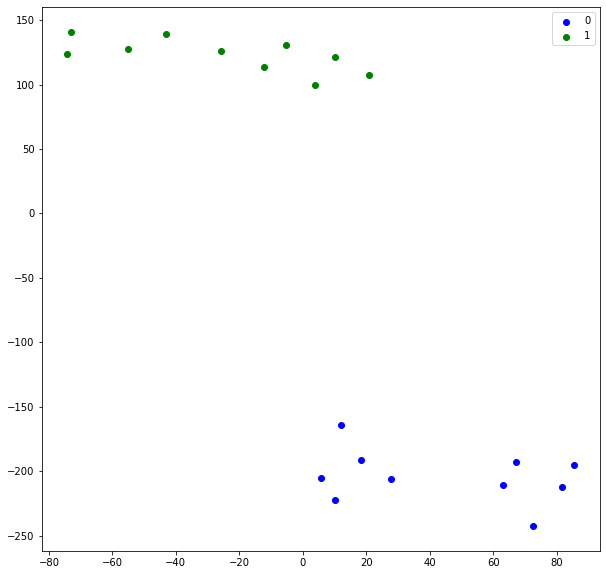

In [20]:
from sklearn.manifold import TSNE
#inbuilt TSNE function sklearn taking perplexity 5 and plotting the scatter plot
model = TSNE(perplexity=5,n_components=2,random_state=0)#TSNE inbuilt from sklearn taking perplexity=5
model_2d = model.fit_transform(X)#fit_transform
inbuilt_cluster(model_2d,y)

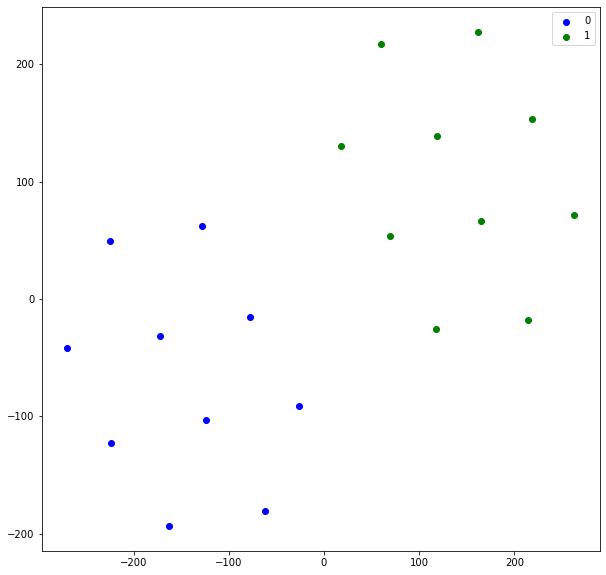

In [21]:
#inbuilt TSNE function sklearn taking perplexity 10 and plotting the scatter plot
model = TSNE(perplexity=15,n_components=2,random_state=0)#TSNE inbuilt from sklearn taking perplexity=15
model_2d = model.fit_transform(X)#fit_transform
inbuilt_cluster(model_2d,y)

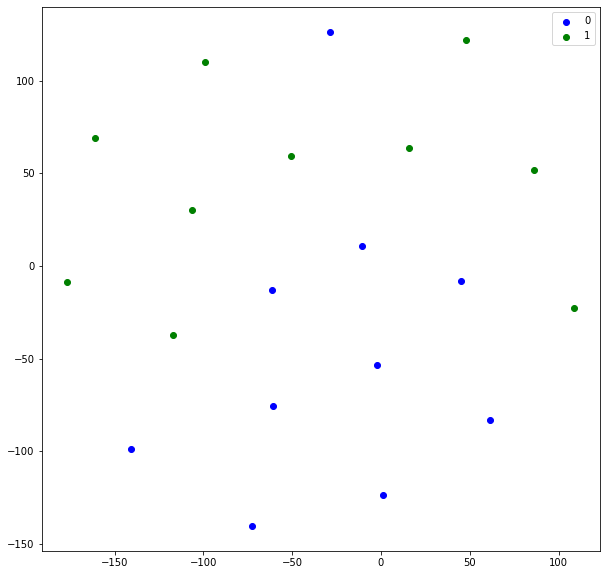

In [22]:
#inbuilt TSNE function sklearn taking perplexity 40 and plotting the scatter plot
model = TSNE(perplexity=40,n_components=2,random_state=0)#TSNE inbuilt from sklearn taking perplexity=40
model_2d = model.fit_transform(X)#fit_transform
inbuilt_cluster(model_2d,y)

#observations
perplexity which actually is the number of close neighbors each point We can clearly see from the above plots that as perplexity increases from 5 to 40 we can see that the cluster is being diverged and after certain value of perplexity(in this case 25) the graph is being constant for whatever the perplexity value is.

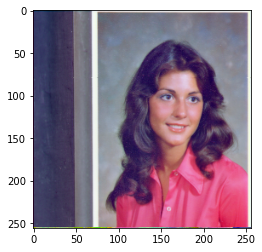

In [23]:
#3a reading the input image extracted from given database
import matplotlib.image as mp
im = mp.imread('4.1.04.tiff')
K=[[-1, 0, 0,], [-1, 5,-1], [0, -1, 0]]#considering 3X3 kernel matrix
K=np.stack((K,K,K),2)#converting it to 2D
plt.imshow(im)#showing the img

In [24]:
#coorelation function which returns the matrix after co-relation operation
def correlation(im,im1):
    m1,n1,a1=im.shape
    m2,n2,a2=im1.shape
    x=m1-m2+1
    y=n1-n2+1
    z=a1
    sum=0
    arr = np.zeros([x,y,z])
    for a in range(x):
        for b in range(y):
            for f in range(z):
                for i,i1 in zip(range(a, a+m2),range(m2)):
                    for j,j1 in zip(range(b,b+n2),range(n2)):
                        sum+=im[i][j][f]*im1[i1][j1][f]#multiplying the indices
                arr[a][b][f]=sum
                sum=0
    plt.imshow(arr/255)#plotting the correlated image
    return arr#returning the correlated array

In [25]:
#function which returns the central patch
def patch(img,k):
    img=np.array(img)
    p=(k-1)//2
    return img[p:-p,p:-p,:]

In [26]:
#function which helps in padding the matrix by taking reflection through edges
def padding(im,b,row,col,m,n):
    p=abs(m-b+1)
    q=abs(n-b+1)
    if p>=row:
        p=2*row-p-2
    if q>=col:
        q=2*col-q-2
    return p,q    

In [27]:
#rescaling the image
def rescale(img):
    min_val = np.amin(img)
    if(min_val<0):
        img = img-min_val
    max_val=np.amax(img)
    img=img/max_val
    plt.imshow(img)
    
    return img

In [28]:
#extracting the dimensions of the image
row,col,a = im.shape
arr = np.zeros([row+2*len(K)-2,col+2*len(K)-2,a])#taking zeros
for i in range(row+2*len(K)-2):
    for j in range(col+2*len(K[0])-2):
        p,q=padding(im,len(K),row,col,i,j)#calling the padding fucntion
        for s in range(a):
            arr[i][j][s]=im[p][q][s]#assignng the values to the new array



In [29]:
#function which returns the matrix after convolution
def convolution(im,im1):
    im1=np.flip(im1,0)
    im1=np.flip(im1,1)
    m1,n1,a1=im.shape
    m2,n2,a2=im1.shape
    x=m1-m2+1
    y=n1-n2+1#final dimensions
    z=a1
    sum=0
    arr = np.zeros([x,y,z])
    for a in range(x):
        for b in range(y):
            for f in range(z):
                for i,i1 in zip(range(a, a+m2),range(m2)):
                    for j,j1 in zip(range(b,b+n2),range(n2)):
                        sum+=im[i][j][f]*im1[i1][j1][f]#formula
                arr[a][b][f]=sum
                sum=0
    plt.imshow(arr/255)#plotting the image
    return arr

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


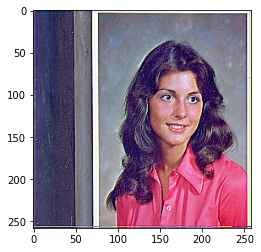

In [30]:
#3a Convolution matrix and taking the central patch and printing the image as well as the dimensions of the image
arr1=convolution(arr,K)
arr1=patch(arr1,len(K))
print(arr1.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


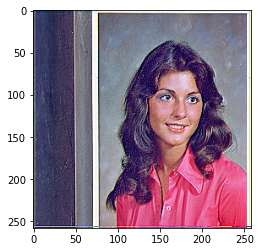

In [31]:
#3b Correlation matrix and taking the central patch and printing the image as well as the dimensions of the image
arr2=correlation(arr,K)
arr2=patch(arr2,len(K))
print(arr2.shape)